In [91]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# V2: Kamera-Versuch

### Konfiguration
frame width: 640.0<br>
frame height: 480.0<br>

brightness: 128.0<br>
contrast: 32.0<br>
saturation: 32.0<br>

gain: 0.0<br>
exposure: -6.0<br>

white balance: 1.0

Abstand kamera 32.5cm


### Daten vom Grauwertkeil visualisiert

100, 101, 102, 103, 105, 236, 237, 238, 239, 240, 241, 372, 373, 374, 375, 376, 377, 506, 507, 508, 509, 510, 511, 551, 

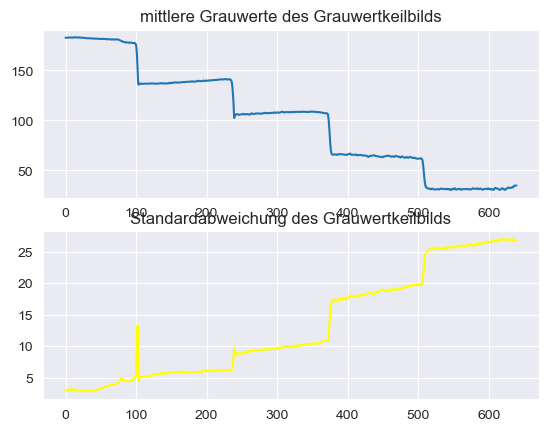

In [92]:
gwk = cv2.imread("./grauwertkeil.png")
grey = cv2.cvtColor(gwk, cv2.COLOR_BGR2GRAY)
#cv2.imshow("grauwertkeil", grey)
gv = np.full((grey.shape[1]), 0, dtype=float)
gvsm = np.full(5, 0, dtype=float)
gvsstd = np.full(5, 0, dtype=float)
stdGV = np.full((grey.shape[1]), 0, dtype=float)
fig, splt = plt.subplots(2)
gw = 0
for i in range(0,grey.shape[1]):
    gv[i] = np.mean(grey[:,i])
    stdGV[i] = np.std(grey[:,i])
    if i > 0 and abs(gv[i-1] - gv[i]) > 1:
        print(i, end=", ")
splt[0].plot(range(0,gv.size),gv)
splt[1].plot(range(0,stdGV.size),stdGV, color='yellow')
splt[0].set_title("mittlere Grauwerte des Grauwertkeilbilds")
splt[1].set_title("Standardabweichung des Grauwertkeilbilds")
cv2.waitKey(0)
cv2.destroyAllWindows()

## A1 Mittelwerte und Standardabweichungen der Bereiche

Bereiche werden abgetrennt von Indizes welche eine relativ große Abweichung zum Index davor hatten

In [93]:
gvsm[0] = np.mean(grey[:,0:99])
gvsm[1] = np.mean(grey[:,106:235])
gvsm[2] = np.mean(grey[:,242:371])
gvsm[3] = np.mean(grey[:,378:505])
gvsm[4] = np.mean(grey[:,512:grey.shape[1]])

gvsstd[0] = np.std(grey[:,0:99])
gvsstd[1] = np.std(grey[:,106:235])
gvsstd[2] = np.std(grey[:,242:371])
gvsstd[3] = np.std(grey[:,378:505])
gvsstd[4] = np.std(grey[:,512:grey.shape[1]])

print(gvsm)
print(gvsstd)

[181.19252946 138.61543928 107.62650194  64.39957349  31.58331706]
[ 4.02602421  6.02818911  9.84735165 18.58766347 26.15016777]


## A2 Schwarzbilder

#### Mittelwertbild kontrastmaximiert dargestellt

0 544
0 545
0 546


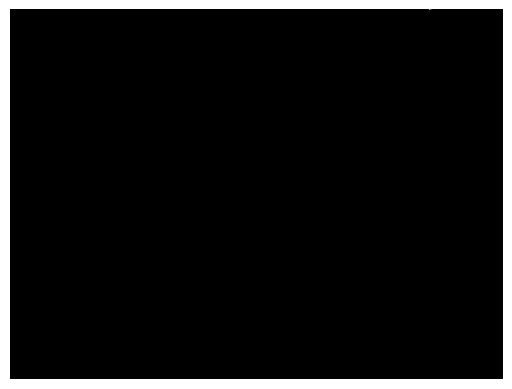

hellster Punkt: 0 544


In [134]:
blackGVal = []
def contrast(arr): return ((arr - np.min(arr)) / abs(np.max(arr) - np.min(arr))) * 255
for i in range(0, 10):
    img = cv2.imread(f"./schwarz{i}.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)
    blackGVal.append(gray)

blackGV = np.array(blackGVal)
mvpb = np.full(shape=(blackGV.shape[1], blackGV.shape[2]), fill_value=100, dtype=float)
for i in range(0, blackGV.shape[1]):
    for j in range(0, blackGV.shape[2]):
        mvpb[i,j] = np.mean(blackGV[:,i,j])
n = contrast(mvpb)
for i in range(0, n.shape[0]):
    for j in range(0, n.shape[1]):
        if mvpb[i,j] > 0: print(i, j)
plt.imshow(contrast(mvpb), cmap='gray',vmax=255,vmin=0)
cv2.imwrite("./mvpblack.png", mvpb)
plt.axis('off')
plt.show()
for i in range(0, n.shape[0]):
    for j in range(0, n.shape[1]):
        if n[i,j] == 255: print("hellster Punkt:", i, j)

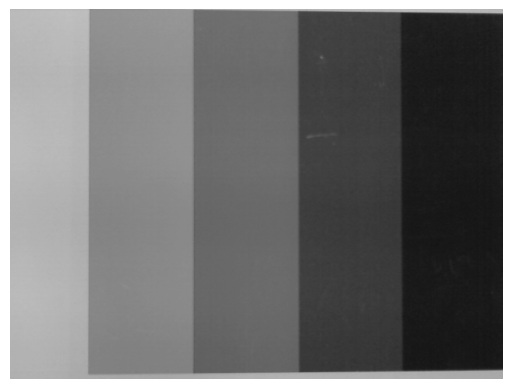

In [123]:
def DarkSubtractPic(picArr):
    black = cv2.cvtColor(cv2.imread(f"./mvpblack.png"), cv2.COLOR_BGR2GRAY)
    out = picArr - black;
    cv2.imwrite('./DarkSubtractPic.png', out)
    return out
#plt.imshow(grey, cmap='gray',vmax=255,vmin=0)
plt.imshow(DarkSubtractPic(grey),vmax=255,vmin=0, cmap='gray')

plt.axis('off')
plt.show()

## A3: Weißbilder
selber Code von Schwarzbild auf Weißbildern angewendet

173.8
207.9


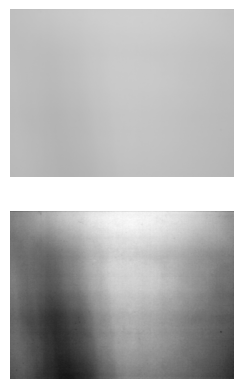

hellster Punkt: 16 311
dunkelster Punkt: 345 602


In [175]:
whiteGVal = []

for i in range(0, 10):
    img = cv2.imread(f"./weiss{i}.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
    whiteGVal.append(gray)

whiteGV = np.array(whiteGVal)
mvpw = np.full(shape=(whiteGV.shape[1], whiteGV.shape[2]), fill_value=100, dtype=np.float64)
for i in range(0, whiteGV.shape[1]):
    for j in range(0, whiteGV.shape[2]):
        mvpw[i, j] = np.mean(whiteGV[:, i, j])
fig, splts = plt.subplots(2)
mvpw = DarkSubtractPic(mvpw)
mean_norm = contrast(mvpw)
print(np.min(mvpw))
print(np.max(mvpw))
splts[0].imshow(mvpw, cmap='gray',vmax=255,vmin=0, )
splts[1].imshow(mean_norm, cmap='gray')
splts[0].axis('off')
splts[1].axis('off')
plt.show()
cv2.imwrite("./pic.png", mean_norm)
for i in range(0, n.shape[0]):
    for j in range(0, n.shape[1]):
        if mean_norm[i,j] == 255: print("hellster Punkt:", i, j)
        if mean_norm[i,j] == 0: print("dunkelster Punkt:", i, j)

#### Normieren mit Weißbild

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

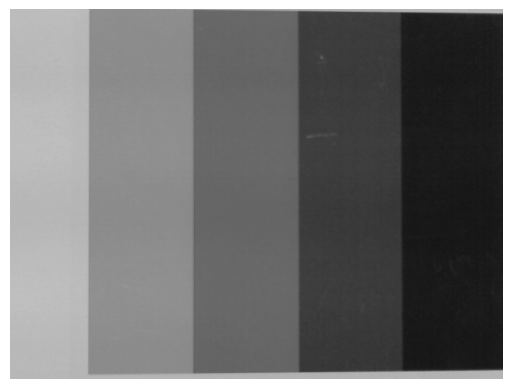

In [161]:
def wNorm (arr):
    normed_white = cv2.cvtColor(cv2.imread("./mvpwhite.png"), cv2.COLOR_BGR2GRAY).astype(np.float64)
    normed_white /= np.mean(normed_white)
    out = DarkSubtractPic(arr) / normed_white
    cv2.imwrite("./wNorm.png", out)
    return out
plt.imshow(wNorm(grey), cmap='gray',vmax=255,vmin=0, )
plt.axis('off')

## A4: Pixelfehler

In [166]:
n = mvpb
for i in range(0, n.shape[0]):
    for j in range(0, n.shape[1]):
        if n[i,j] > 0: print("Hot- oder stuckpixel:", i, j)

Hot- oder stuckpixel: 0 544
Hot- oder stuckpixel: 0 545
Hot- oder stuckpixel: 0 546


#### Hot und stuckpixels
<img src="./hot-stuck-pixels.png">

#### deadpixels
<img src="./deadpixels.png">

### Anwendung Grauwertkeil

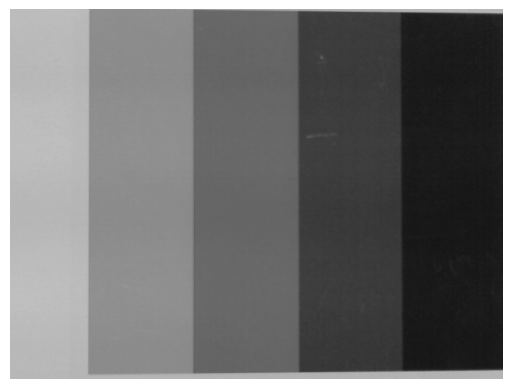

In [147]:
cgwk = wNorm(grey)
cv2.imwrite("./correctedGWK.png", cgwk)
plt.imshow(cgwk, cmap='gray',vmax=255,vmin=0)
plt.axis('off')
plt.show()

### std und mean von den Steps

In [153]:
gvsm[0] = np.mean(cgwk[:,0:99])
gvsm[1] = np.mean(cgwk[:,106:235])
gvsm[2] = np.mean(cgwk[:,242:371])
gvsm[3] = np.mean(cgwk[:,378:505])
gvsm[4] = np.mean(cgwk[:,512:grey.shape[1]])

gvsstd[0] = np.std(cgwk[:,0:99])
gvsstd[1] = np.std(cgwk[:,106:235])
gvsstd[2] = np.std(cgwk[:,242:371])
gvsstd[3] = np.std(cgwk[:,378:505])
gvsstd[4] = np.std(cgwk[:,512:grey.shape[1]])

print(gvsm)
print(gvsstd)

[185.92533584 141.85265761 104.64331901  62.94077777  31.98079554]
[ 2.50871043  4.63384731 10.0665285  18.56446696 26.83029294]


Text(0.5, 1.0, 'Standardabweichung des Grauwertkeilbilds')

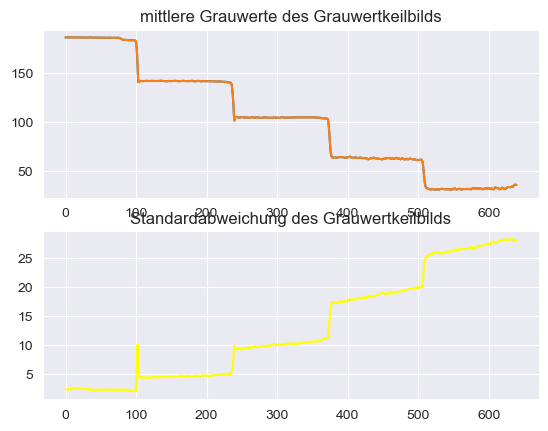

In [173]:
fig, splt = plt.subplots(2)
gw = 0
cgv = np.full((grey.shape[1]), 0, dtype=float)
for i in range(0,grey.shape[1]):
    cgv[i] = np.mean(cgwk[:,i])
    stdGV[i] = np.std(cgwk[:,i])
splt[0].plot(range(0,gv.size),cgv)
splt[1].plot(range(0,stdGV.size),stdGV, color='yellow')
splt[0].set_title("mittlere Grauwerte des Grauwertkeilbilds")
splt[1].set_title("Standardabweichung des Grauwertkeilbilds")

#### Variablen:
- mvpb / mvpw: Mean Value Picture (Black / White)
- blackGVal / whiteGVal: Laufliste (black grey values)
- gvsm: Grey Value Steps Mean
- gvsstd: Grey Value Steps Std